<a href="https://www.kaggle.com/code/mh0386/iris-classification-from-scratch?scriptVersionId=248971831" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Iris Classification from Scratch

- Created to classify Iris flowers into three species: `Setosa`, `Versicolor`, and `Virginica`
- Trained on a dataset of 150 Iris flowers
- Achieved an accuracy of `~93%`

## Collaborators:
* [Mohamed Hisham](https://kaggle.com/MH0386)
* [Abdelrahman Mostafa](https://www.kaggle.com/abdelrahmanm2003)
* [Abdelrahman Elshafie](https://www.kaggle.com/abdelrahmansaeed3)

# Imports

In [1]:
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt

# Loading the data set

In [2]:
dataset = datasets.load_iris()
data = dataset.data[:, [0, 2]]  # assigning the features data
data_class = dataset.target  # assigning the label data
remaining_features = dataset.data[:, [1, 3]]

In [3]:
data

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

# Random shuffling the data

In [4]:
data, data_class, remaining_features = shuffle(data, data_class, remaining_features)

# Loading the classifier

In [5]:
model = GaussianNB()

# Splitting the data into train, validate, test samples

In [6]:
def split(features, label, valRatio, testRatio):
    # getting the samples sizes
    testSample = int(len(label) * testRatio)
    validationSample = int(len(label) * valRatio + testSample)

    # splitting the data into 3 samples
    x_test, y_test = features[:testSample], label[:testSample]
    x_validation, y_validation = (
        features[testSample:validationSample],
        label[testSample:validationSample],
    )
    x_train, y_train = features[validationSample:], label[validationSample:]

    # returning samples
    return x_train, y_train, x_test, y_test, x_validation, y_validation

In [7]:
def train_validate_test_split(features, labels, testRatio=0.3, valRatio=0.3):
    # first we split the data into 3 sets:
    # 1) train dataset to train our model (x_train, y_train)
    # 2) validation dataset to improve model's accuracy (x_validation, y_validation)
    # 3) test dataset to test the model and make it predict the labels for unknown data (x_test, y_test)
    x_train, y_train, x_test, y_test, x_validation, y_validation = split(
        features, labels, valRatio, testRatio
    )

    # secondly, we train our model using the training samples
    train(x_train, y_train)

    # thirdly, we validate the model using validation samples
    validate(x_validation, y_validation)

    # and then we test the model and let it predict the labels of unknown data
    predicted_values = test(x_test)

    # finally, we calculate the model's accuracy
    calc_accuracy(predicted_values, y_test)

#  Train the model

In [8]:
def train(xtrain, ytrain):
    hist = model.fit(xtrain, ytrain)
    return hist

# Validate the model and trying to increase the accuracy

In [9]:
def validate(xvalidation, yvalidation):
    model.fit(xvalidation, yvalidation)

# Test the model used

In [10]:
def test(xtest):
    predicted_results = model.predict(xtest)
    return predicted_results

# Calculate model accuracy

In [11]:
def calc_accuracy(predicted, original):
    cnt = 0
    for i in range(len(predicted)):
        if predicted[i] == original[i]:
            cnt += 1
    print("Accuracy = ", cnt / len(original) * 100)

# calling train_validate_test_split() function to train, validate, test, and calculate the accuracy of the model

In [12]:
train_validate_test_split(data, data_class)

Accuracy =  91.11111111111111


# Using plot_decision_regions() function to draw the decision boundaries of the model

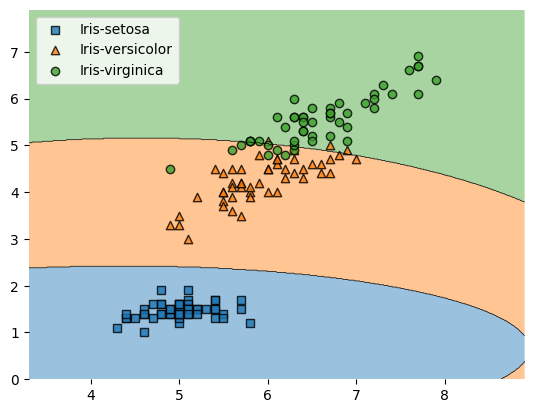

In [13]:
ax = plot_decision_regions(
    data,
    data_class,
    clf=model,
    legend=0,
    filler_feature_values={1: 3.045, 3: 1.198667},
    filler_feature_ranges={1: 2.2, 3: 2.4},
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.show()